<a href="https://colab.research.google.com/github/landier/sql-interview/blob/main/SQL_tech_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [23]:
# !wget https://github.com/landier/sql-interview/blob/main/data/chinook.sqlite3
!wget https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3

--2024-03-23 15:44:59--  https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3
Resolving tdmdal.github.io (tdmdal.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to tdmdal.github.io (tdmdal.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3.2’

northwind.sqlite3.2 100%[===================>] 786.00K  --.-KB/s    in 0.05s   

2024-03-23 15:44:59 (16.5 MB/s) - ‘northwind.sqlite3.2’ saved [804864/804864]



In [19]:
%reload_ext sql

test

In [24]:
# %sql sqlite:///sql-interview/data/chinook.db
%sql sqlite:///northwind.sqlite3

In [25]:
%%sql
SELECT sqlite_version();

   sqlite:///northwind.db
 * sqlite:///northwind.sqlite3
Done.


sqlite_version()
3.37.2


#Exercice

In [26]:
# List of tables
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

   sqlite:///northwind.db
 * sqlite:///northwind.sqlite3
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


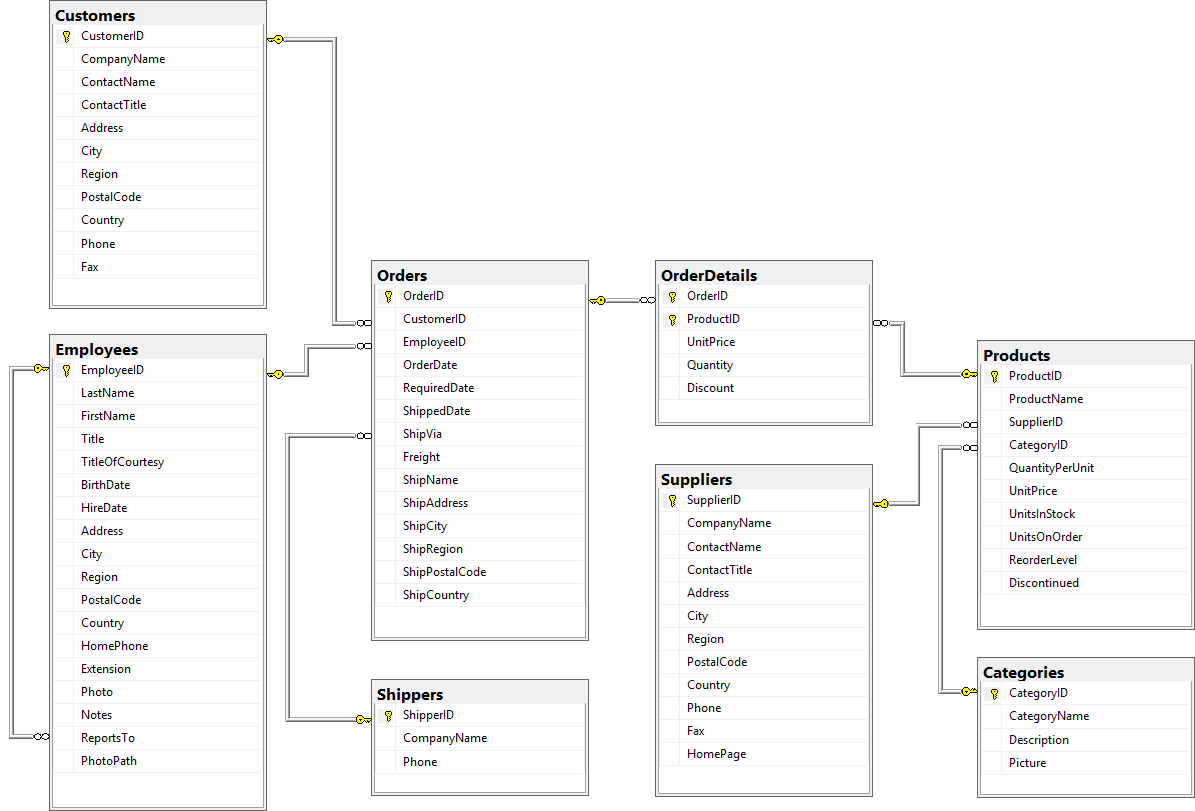

In [27]:
%%sql
PRAGMA table_info([Categories]);

   sqlite:///northwind.db
 * sqlite:///northwind.sqlite3
Done.


cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


**Question**: What are the top 10 artists with the most albums?

In [ ]:
%%sql
-- Code here

   sqlite://
 * sqlite:///sql-interview/data/chinook.db
Done.


[]

## Answer

In [ ]:
%%sql
SELECT
  ArtistId,
  COUNT(*)
FROM albums
GROUP BY ArtistId
ORDER BY COUNT(*) DESC
LIMIT 10

   sqlite://
 * sqlite:///sql-interview/data/chinook.db
Done.


ArtistId,COUNT(*)
90,21
22,14
58,11
50,10
150,10
114,6
118,5
21,4
82,4
84,4


# Progression

1.   GROUP BY
2.   MAX
3.   DISTINCT A,B
4.   JOIN
5.   SUBQUERY



## Exercises

**We will work on the problems with a * sign together.** Other problems are left for homework.

## Part 1. Warm-up

We review

1. Retrieve data: `SELECT...FROM...`
2. Sort retrieved data: `SELECT...FROM...ORDER BY...`
3. Filter data: `SELECT...FROM...WHERE...`; `IN`, `NOT`, `LIKE` and `%` wildcard
4. Create calculated fields: mathematical calculations (e.g. +, -, *, /); data manipulation functions (e.g. `DATE()`, `||`)

### Ex1*. Which categories do we have?

Display `CategoryName` and `Description` in the `Categories` table.

In [ ]:
%%sql
-- start your code here


In [ ]:
# Just curious, what's in the picture column?
result = %sql SELECT CategoryName, Picture FROM Categories;
result.DataFrame().loc[0, 'Picture']

In [ ]:
# still curious about the picture column?
# image is actually stored as a blob (Binary Large Object) in SQLite
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
%matplotlib inline
row = 0
im = Image.open(BytesIO(result.DataFrame().loc[row, 'Picture'][78:])) # cut the first 78 bytes (OLE header)
print(im)
imshow(im)

### Ex2. Which shippers do we have?

In [ ]:
%%sql
-- start your code here


### Ex3* Find names and hire dates of all US sales representatives

The resulting table should display `FirstName`, `LastName`, `HireDate`, `Title` and `Country`.

In [ ]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employees
LIMIT 10

In [ ]:
%%sql
-- just curious, how many distinct coutries do we have?
SELECT DISTINCT Country
FROM Employees

In [ ]:
%%sql
-- start your code here


### Ex4. Find supplier contacts who are *not* marketing managers

Display `supplierID`, `ContactNames` and `ContactTitle` for those whose `ContactTitle` is *not* Marketing Manager.

Hint: `NOT` operator.

In [ ]:
%%sql
-- start your code here


### Ex.5* Find products with "Chef" in its name

Hint: `LIKE` operator and `%` wildcard.

In [ ]:
%%sql
-- start your code here


### Ex.6 Find all orders shipping to Canada, Mexico or USA.

Hint: `IN` operator.

In [ ]:
%%sql
-- start your code here


### Ex.7* Who is the oldest employee?

Display `FirstName`, `LastName`, `Title`, and birth date, ordered by birth date. Show only the date portion of the `BirthDate` column/field (YYYY-MM-DD).

In [ ]:
%%sql
-- start your code here


### EX.8 Show employee full name

Show the `FirstName` and `LastName` columns from the `Employees` table, and then create a new column called `FullName`, showing first name and last name joined together in one column in a format like "DAVOLIO, Nancy".

In [ ]:
%%sql
-- start your code here


### Ex.9* Which order items have total sales above $12,000.

In the `OrderDetails` table, we have the columns `UnitPrice` and `Quantity`. Create a new column, `TotalPrice`, that multiplies these two (ignore the `Discount` column). Display `OrderID`, `ProductID`, `UnitPrice`, `Quantity` and `TotalPrice`. Order the result first by `ProductID` (ascending) and then by `TotalPrice` (descending).

Note that the question asks about order items (not orders). One order may contain multiple items/products. An order item is identified by the `OrderID` and `ProductID` columns.

In [ ]:
%%sql
-- start your code here


### Ex.10 Show all products that need reordering

A product need reordering if `UnitsInStock + UnitsOnOrder <= ReorderLevel` and `Discontinued = 0`. In your result, display `ProductID`, `ProductName`, `UnitsInStock`, `UnitsOnOrder`, `ReorderLevel`, and `Discontinued`.

In [ ]:
%%sql
-- start your code here


## Part 2. Summarize and Group Data

1. Summarize data using aggregate functions (e.g. `COUNT()`, `MIN()`, `MAX()`, and `AVG()`).
2. Group data and filter groups: `SELECT...FROM...GROUP BY...HAVING...`.
3. `SELECT` clause ordering: `SELECT...FROM...WHERE...GROUP BY...HAVING...ORDER BY...`.
4. Filter data by *subquery*: `SELECT...FROM...WHERE...(SELECT...FROM...)`

### Ex.11* Count total number of order items. What's their minimum, maximum and average price?

Note that the question asks about order items (not orders). One order may contain multiple items/products. An order item is identified by (OrderID + ProductID).

In [ ]:
%%sql
-- start your code here


### Ex. 12* How many customers do we have for each contact title.

Order the result by the count of contact titles.

In [ ]:
%%sql
-- start your code here


### Ex.13 Find total customers per country and city

In [ ]:
%%sql
-- start your code here


### Ex.14* Show all orders with values greater than $12,000?

Ignore the `Discount`. Contrast this question to Ex.9.

In [ ]:
%%sql
-- start your code here


### Ex.15* Find top three countries with the highest average freight charges for the last 12 months.

"The last 12 months" is with respect to the last `OrderDate` in the `Orders` table.

In [ ]:
%%sql
-- start your code here
-- datetime(): https://www.sqlite.org/lang_datefunc.html


## Part 3. Join Tables

1. Inner join: `SELECT...FROM...INNER JOIN...ON...`
2. Left join:  `SELECT...FROM...LEFT JOIN...ON...`
3. Other joins.

### Ex.16* Show products and their associated suppliers

Display the `ProductID`, `ProductName`, and the `CompanyName` of the Supplier. Sort by `ProductID`.

We can use the `WHERE` keyword.

In [ ]:
%%sql
-- start your code here


We can also use the `(INNER) JOIN` keyword.

In [ ]:
%%sql
-- start your code here


### Ex.17 Show all orders and shippers with OrderID less than 10255.

Display `OrderID`, `OrderDate` (date only), and `CompanyName` of the Shipper, and sort by `OrderID`. In addition, only display rows with `OrderID < 10255`.

In [ ]:
%%sql
-- start your code here


### Ex.18* Find total number of products in each category

In your result, display `CategoryName` and total number of product.

In [ ]:
%%sql
-- start your code here


### Ex.19 Show all orders with values greater than $12,000 and are placed in 2016?

In your result, display `OrderID` and total value of the order (ignore `Discount`).

In [ ]:
%%sql
-- start your code here


### Ex.20* What products has Michael Suyama ever sold?

In your result, display `EmployeeID`, `FirstName`, `LastName`, `ProductID` and `ProductName`.

In [ ]:
%%sql
-- start your code here


### Ex.21* Find customers that never placed an order

In [ ]:
%%sql
-- start your code here


Note that the Jupyter Notebook displays Null as None.

### Ex.22* Find customers who never placed an order from Margaret Peacock (EmployeeID 4)

In [ ]:
%%sql
-- start your code here


### Ex.23* Find high-value customers - 1

We define high-value customers as those who have made at least 1 order with a total value >= $10,000 (ignore discount). We only consider orders placed in year 2016.

In [ ]:
%%sql
-- start your code here


### Ex.24 Find high-value customers - 2

This time, we define high-value customers as those who have made total order >= $15,000 (ignore discount). We only consider orders placed in year 2016.

In [ ]:
%%sql
-- start your code here


## Part 4. Others

If we don't have time to go through all the concepts below, I encourage you to learn them on your own.

1. CTE and temporary table
2. Self-join
3. `CASE` keyword
4. `UNION` keyword

Many SQL implementations support something called Common Table Expression (CTE).

>A CTE is a named temporary result set that exists within the scope of a single statement and that can be referred to later within that statement, possibly multiple times.

CTE is like a subquery, but it's more flexible. In particular, it can be referred to many times in a query, as if we have a temporary table. CTE is created using the `WITH` keyword. Below is a trivial example of CTE.

```
WITH
  cte1 AS (SELECT a, b FROM table1),
  cte2 AS (SELECT c, d FROM table2)
SELECT b, d FROM cte1 JOIN cte2
WHERE cte1.a = cte2.c;

```

You can also use a temporary table to store `SELECT` result. Temporary table can be referred to multiple times in a single session. The syntax to create temporary table and store results from `SELECT` is

```
CREATE TEMPORARY TABLE TableName AS SELECT...
```

### Ex.25* Find the total number of orders fulfilled by the oldest employee (CTE, Subquery, and temporary table)

In [ ]:
%%sql
/* CTE (WITH keyword) */
-- start your code here


In [ ]:
%%sql
/* Subquery */
-- start your code here


In [ ]:
%%sql
/* Temporary Table */
-- start your code here


### Ex.26* For each employee, find what percentage of his/her orders were shipped late?

In your result, display `EmployeeID`, `LastName`, total number of orders, number of late orders, % of late orders (rounding to 2 decimal places).

Define late order as `RequiredData <= ShipppedDate`.

Below are three simpler related questions. You may want to solve them first before you attempt Ex.26 itself.

1. Which orders were shipped late?
2. Which employee has the most late orders?
3. Compare each employee's number of orders and number of late orders.

Note: There are many ways to solve this exercise. One of them is to create temporary tables to help us store intermediate results.

In [ ]:
%%sql
-- 1. Which orders were shipped late?
-- start your code here


In [ ]:
%%sql
-- 2. Which employee has the most late orders?
-- start your code here


In [ ]:
%%sql
-- 3. Compare each employee's number of orders and number of late orders
-- start your code here


In [ ]:
%%sql
-- Solve Ex.26 (Find % of late orders for each employee)
-- start your code here


### Ex.27* Find customers with multiple orders in 5 day period

In [ ]:
%%sql
-- start your code here
-- JOIN keyword


### Ex.28 Group customers by its total order value in 2016 for a sales compaign.

Group customers into four categories, very high (total order in 2016 > 10,000), high (5,000 < total order <= 10,000), medium (1,000 < total order <= 5,000), and low (0 < total order <= 1,000). When calculating total order value, you can ignore discount.

We will learn the `CASE` keyword.

In [ ]:
%%sql
-- step 1
DROP TABLE IF EXISTS TotalOrderAmountTpTable;

CREATE TEMPORARY TABLE TotalOrderAmountTpTable AS
SELECT Customers.CustomerID, CompanyName, SUM(UnitPrice * Quantity) AS TotalOrderAmount
FROM Customers
  JOIN Orders ON Customers.CustomerID = Orders.CustomerID
  JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
WHERE strftime('%Y', OrderDate) = "2016"
GROUP BY Customers.CustomerID, CompanyName
ORDER BY TotalOrderAmount DESC

In [ ]:
%%sql
-- step 2
SELECT CustomerID, CompanyName, totalOrderAmount,
CASE
  WHEN TotalOrderAmount > 0 AND TotalOrderAmount <= 1000 THEN 'Low'
  WHEN TotalOrderAmount > 1000 AND TotalOrderAmount <= 5000 THEN 'Medium'
  WHEN TotalOrderAmount > 5000 AND TotalOrderAmount <= 10000 THEN 'High'
  WHEN TotalOrderAmount > 10000 THEN 'Very High'
END AS CustomerCategory
FROM TotalOrderAmountTpTable
ORDER BY CustomerID;

### Ex. 29 Countries with suppliers and customers

Some Northwind employees are planning a business trip, and they would like to visit as many customers and suppliers as possible. They would like to see a list of all countries and their corresponding total number of customers and total number of suppliers.

#### Method 1. Use intermediate tables.

We will use temporary tables.

In [ ]:
%%sql
-- step 1: count total customers by country
DROP TABLE IF EXISTS TotalCustomersTpTable;

CREATE TEMPORARY TABLE TotalCustomersTpTable AS
SELECT Country, COUNT(CustomerID) AS TotalCustomers
FROM Customers
GROUP BY Country

In [ ]:
%%sql
-- step 2: count total suppliers by country
DROP TABLE IF EXISTS TotalSuppliersTpTable;

CREATE TEMPORARY TABLE TotalSuppliersTpTable AS
SELECT Country, COUNT(SupplierID) AS TotalSuppliers
FROM Suppliers
GROUP BY Country

In [ ]:
%%sql
-- step 3: join two intermediate tables (full outer join using union)
SELECT TotalCustomersTpTable.Country, TotalCustomers, TotalSuppliers
FROM TotalCustomersTpTable
  LEFT JOIN TotalSuppliersTpTable
    ON TotalCustomersTpTable.Country = TotalSuppliersTpTable.Country
UNION
SELECT TotalSuppliersTpTable.Country, TotalCustomers, TotalSuppliers
FROM TotalSuppliersTpTable
  LEFT JOIN TotalCustomersTpTable
    ON TotalCustomersTpTable.Country = TotalSuppliersTpTable.Country
ORDER BY TotalSuppliersTpTable.Country

In [ ]:
%%sql
-- clean up
DROP TABLE TotalCustomersTpTable;
DROP TABLE TotalSuppliersTpTable;

#### Method 2. Use subquery to get a derived table

We find all distinct countries in `Customers` and `Supplier` tables, and combine them to be a derived table `CountriesTable`. This table exists only during the execution of the query. We then `LEFT JOIN` the table to `Customers` and `Supplier` tables, and use `GROUP BY` to obtain the result.

In [ ]:
%%sql
-- Display intermediate result to take a look (debug)
SELECT
  CountriesTable.Country,
  CustomerID,
  SupplierID
FROM
  (SELECT DISTINCT Country FROM Customers
   UNION
   SELECT DISTINCT Country FROM Suppliers
  ) AS CountriesTable -- We have a subquery under the FROM keyword. It gives a derived table, CountriesTable.
  LEFT JOIN Customers ON CountriesTable.Country = Customers.Country
  LEFT JOIN Suppliers ON CountriesTable.Country = Suppliers.Country

In [ ]:
%%sql
-- now, completely solve ex.29
SELECT
  CountriesTable.Country,
  Count(DISTINCT CustomerID) AS TotalCustomers,
  Count(DISTINCT SupplierID) AS TotalSuppliers
FROM
  (SELECT DISTINCT Country FROM Customers
   UNION
   SELECT DISTINCT Country FROM Suppliers
  ) AS CountriesTable -- We have a subquery under the FROM keyword. It gives a derived table, CountriesTable.
  LEFT JOIN Customers ON CountriesTable.Country = Customers.Country
  LEFT JOIN Suppliers ON CountriesTable.Country = Suppliers.Country
GROUP BY CountriesTable.Country
ORDER BY CountriesTable.Country

## Summary

We have covered quite a few basic SQL keywords. They are mostly about getting data from a DB and manipulate the retrieved data. There are much more to SQL. Take a look at this [post](https://stackoverflow.com/questions/2054130/what-is-advanced-sql) to get an idea of what advanced SQL topics are about, and if you are interested, explore them on your own.


## References

Most of the exercises in this notebook are drawn from this [book](https://www.amazon.ca/SQL-Practice-Problems-learn-doing-ebook/dp/B01N41VQFO) by Sylvia Moestl Vasilik. The book is based on Microsoft SQL server and its T-SQL.

Another great SQL book for beginner is [SQL in 10 Minute](https://www.amazon.ca/SQL-Minutes-Sams-Teach-Yourself/dp/0135182794) by Ben Forta.

## Appendix

Examples of various joins shown in the slides.

In [ ]:
# create a new sqlite database
%sql sqlite:///join_playground.sqlite3

In [ ]:
%%sql

-- create left table: table1
DROP TABLE IF EXISTS table1;

CREATE TABLE table1 (
  pk INTEGER NOT NULL,
  t1c1 TEXT NOT NULL
);

INSERT INTO table1
    (pk, t1c1)
VALUES
    (1,"a"),
    (2,"b");

-- create right table: table2
DROP TABLE IF EXISTS table2;

CREATE TABLE table2 (
  fk INTEGER NOT NULL,
  t2c1 TEXT NOT NULL
);

INSERT INTO table2
    (fk, t2c1)
VALUES
    (1,"c"),
    (1,"d"),
    (3,"e");

In [ ]:
%%sql
select * from table1;

In [ ]:
%%sql
select * from table2;

In [ ]:
%%sql
-- inner join
select * from table1 join table2 on table1.pk = table2.fk

In [ ]:
%%sql
-- left join
select *
from table1
  left join table2 on table1.pk = table2.fk

In [ ]:
%%sql
-- left join with exclusion
select *
from table1
  left join table2 on table1.pk = table2.fk
where table2.fk IS NULL

In [ ]:
%%sql
-- right join using LEFT JOIN key word
select *
from table2
  left join table1 on table2.fk = table1.pk

In [ ]:
%%sql
-- right join with exclusion using LEFT JOIN and WHERE key word
select *
from table2
  left join table1 on table2.fk = table1.pk
where table1.pk is NULL

In [ ]:
%%sql
-- fuller outer join
-- it is important to list all the column names (i.e. not using *; can use * if using MySQL)
-- https://stackoverflow.com/questions/53076981/sql-union-doesnt-check-for-matching-column-names-is-it-up-to-me

select pk, t1c1, fk, t2c1
from table1
  left join table2 on table1.pk = table2.fk
union
select pk, t1c1, fk, t2c1
from table2
  left join table1 on table2.fk = table1.pk;

In [ ]:
%%sql
-- full outer join with exclusion
select pk, t1c1, fk, t2c1
from table1
  left join table2 on table1.pk = table2.fk
where table2.fk is NULL
union
select pk, t1c1, fk, t2c1
from table2
  left join table1 on table2.fk = table1.pk
where table1.pk is NULL;